<IPython.core.display.Javascript object>


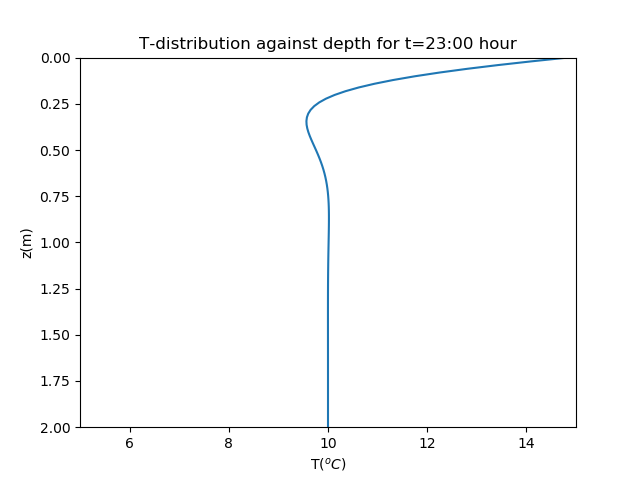

In [1]:
# heatpen_osc
# Calculating daily or yearly heat penetration into the ground
# 
# Earth Structure and Dynamics 2021, week 1, question 4
# Jeroen van Hunen, 20200426
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Initialisation of the parameters:
T0     = 10            # Average surface temperature
dT     = 5             # Temperature fluctuation
kappa  = 1e-6          # Thermal diffusivity
tau    = 24*60*60      # period of oscillation (1 day)
zmax   = 2             # Max depth to calculate/plot
nz     = 100           # number of depth for plotting
tmax   = 24*60*60      # Max depth to calculate/plot 
nt     = 24            # number of timesteps for plotting
tplot  = 1*60*60       # time of snapshot for plotting (in sec)
zplot  = 0.5           # depth for plot (in m)

omega  = 2*np.pi/tau
z      = np.linspace(0,zmax,nz)       # create depth array
t      = np.linspace(0,tmax,nt)       # create depth array

# plot of T against z for one specific time step:
fig, ax = plt.subplots()
it=1
while(it < nt):
    zphase = z*np.sqrt(omega/(2*kappa))   # pre-calc z phase delay
    Tz     = T0 + dT*np.exp(-zphase)*np.cos(omega*tplot*it-zphase) 
    # Plot z-solution:
    ax.clear()
    ax.set_xlim(5,15)
    ax.set_ylim(0,2)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.plot (Tz,z,'-')
    ax.set_xlabel('T$(^oC)$')
    ax.set_ylabel('z(m)')
    ax.set_title('T-distribution against depth for t=%1.0f:00 hour' %(tplot*it/60/60))
    ax=plt.gca()
    fig.canvas.draw()
    it=it+1